Análisis de datos en salud
============================

Unidad 6 - Parte práctica
-----------------------------------------------------


## Datos de expresión de proteinas

El dataset `mice_protein_expression.csv` consta de los niveles de expresión de 77 proteínas/modificaciones de proteínas del cortex cerebral de ratones. Hay 38 ratones control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos se registraron 15 mediciones de cada proteína por muestra/ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 medidas, y para los ratones trisómicos, hay 34x15, o 510 medidas. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medición puede considerarse como una muestra/ratón independiente.

Hay ocho clases de ratones, que se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (contexto-shock) y otros no (shock-contexto). Y para evaluar el efecto del fármaco memantina en la recuperación de la capacidad de aprender en ratones trisómicos, se han estimulado algunos ratones inyectados con la droga y otros no.

**Clases**:
- c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
- c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
- c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
- c-SC-m: ratones control, no estimulados para aprender, inyectados con memantina (10 ratones)
- t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones)
- t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones)
- t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones)
- t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)


**Columnas del dataset**:

Información de atributos
- [1] ID del ratón
- [2:78] Valores de los niveles de expresión de 77 proteínas.
- [79] Genotipo: control (c) o trisomía (t)
- [80] Tipo de tratamiento: memantina (m) o solución salina (s)
- [81] Comportamiento: shock-contexto (CS) o shock-contexto (SC)
- [82] Clase: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-metro

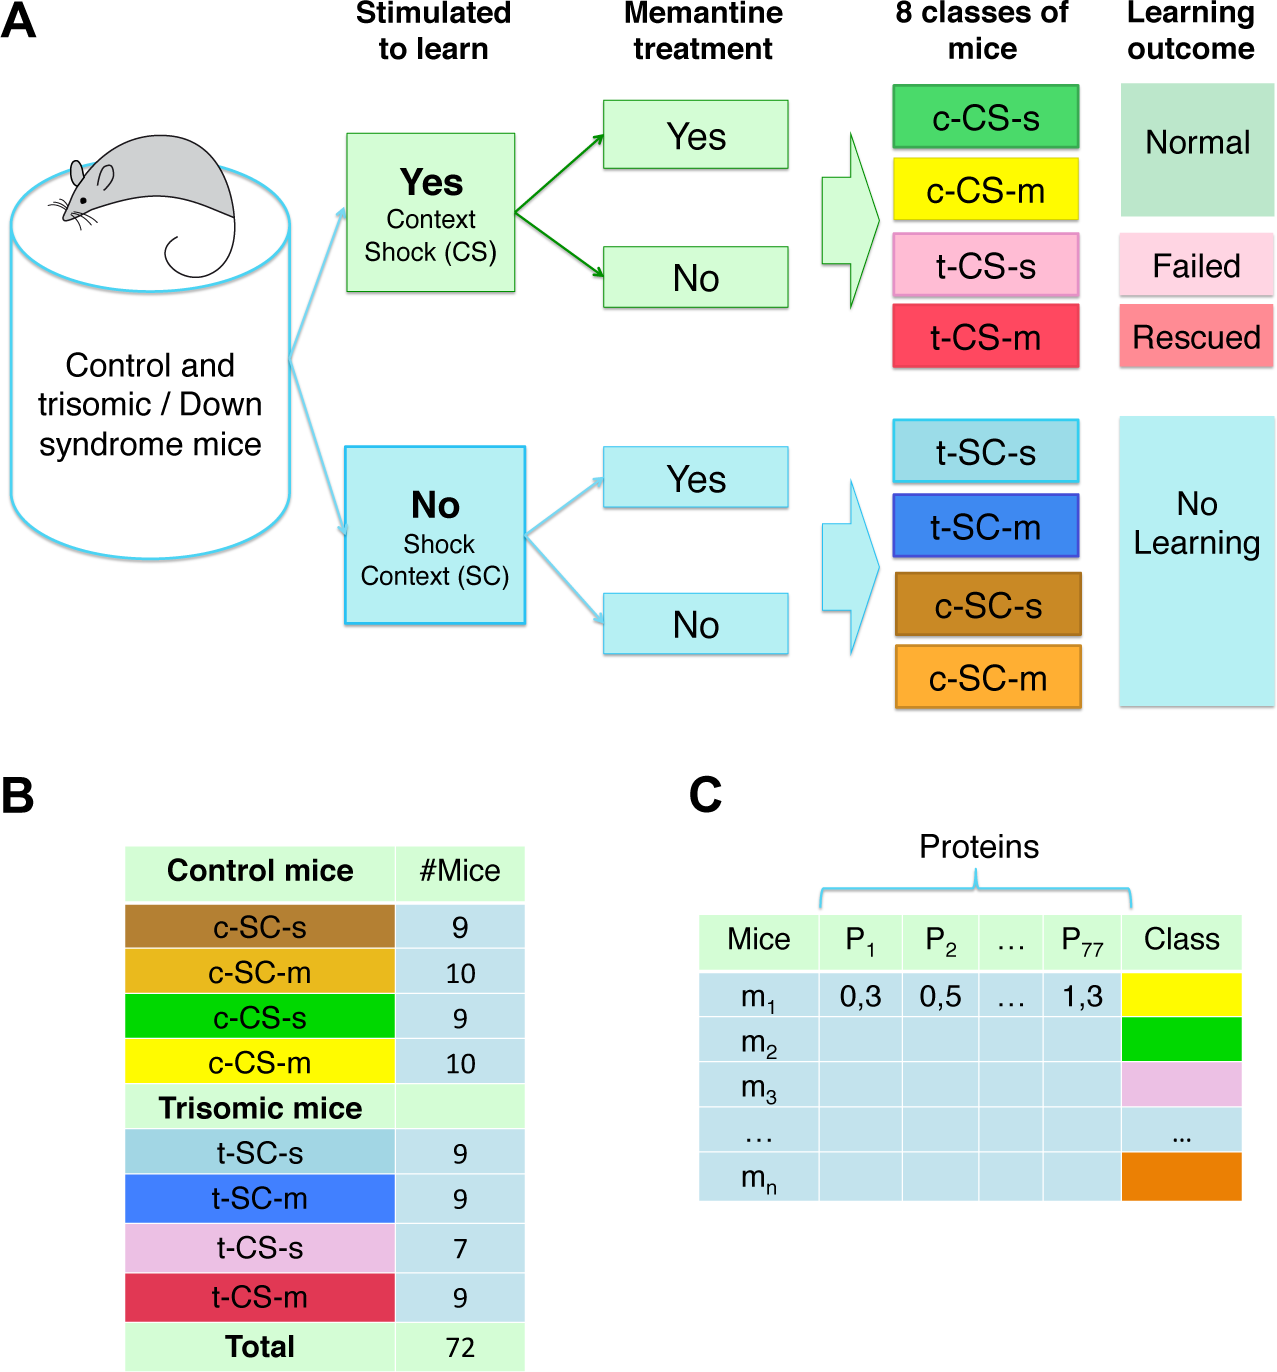

In [ ]:
from IPython import display
display.Image("img/protein_exp_mice.png", width=700)

### Ejercicio 1

a) Primero de todo vamos a explorar un poco el dataset. Carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 5 primeras filas.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos
%cd /content/drive/MyDrive/Data Health/6/Parte práctica-6/mice_protein_expression.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 20] Not a directory: '/content/drive/MyDrive/Data Health/6/Parte práctica-6/mice_protein_expression.csv'
/content


In [3]:
df_mice_protein = pd.read_csv('/content/drive/MyDrive/Data Health/6/Parte práctica-6/mice_protein_expression.csv', sep=",")
df_mice_protein.head(5)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
df_mice_protein.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [5]:
df_mice_protein.info()
# df_mice_protein.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

b) ¿Hay filas duplicadas en el dataset?



In [6]:
# CHECK FOR DUPLICATES
print("\nNúmero de filas duplicadas:", df_mice_protein.duplicated().sum())


Número de filas duplicadas: 0


c) Hay algún valor perdido (*missing*) (NaN) en el dataset? Si tenemos columnas con más del 5% de muestras con NaNs, crea un nuevo df sin estas. Para las otras columnas (<=5% de NaNs), puedes eliminar las filas con NaNs.

In [7]:
# NaN
df_mice_protein.isnull()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1078,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# NaN sum
df_mice_protein.isnull().sum()

,0
MouseID,0
DYRK1A_N,3
ITSN1_N,3
BDNF_N,3
NR1_N,3
...,...
CaNA_N,0
Genotype,0
Treatment,0
Behavior,0


In [9]:
# HIGHLIGHTED NaNs
df_mice_protein.isnull().sum()
df_mice_protein.style.highlight_null(color="#DDA0DD")

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# DYRK1A_Ncolumn
df_mice_protein['DYRK1A_N'].values

array([0.50364388, 0.51461708, 0.50918309, ..., 0.22869955, 0.22124241,
       0.30262572])

In [11]:
# ITSN1_Ncolumn
df_mice_protein['ITSN1_N'].values

array([0.74719322, 0.68906355, 0.7302468 , ..., 0.39517937, 0.41289438,
       0.46105919])

In [12]:
# BDNF_N column
df_mice_protein['BDNF_N'].values

array([0.4301753 , 0.41177034, 0.41830878, ..., 0.23411809, 0.24397413,
       0.25656431])

In [13]:
# NR1_Ncolumn
df_mice_protein['NR1_N'].values

array([2.81632854, 2.78951404, 2.68720107, ..., 1.73318386, 1.87634725,
       2.09279039])

In [17]:
# Calculate the percentage of NaNs in each column
nan_percentage = df_mice_protein.isnull().sum() / len(df_mice_protein) * 100

# Identify columns with more than 5% NaNs
high_nan_cols = nan_percentage[nan_percentage > 5].index

print(high_nan_cols)

Index(['BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'], dtype='object')


In [22]:
# Create a new DataFrame without high NaN columns
df_mice_protein_filtered = df_mice_protein.drop(columns=high_nan_cols)

# Remove rows with NaNs in the remaining columns
df_mice_protein_filtered= df_mice_protein_filtered.dropna()

In [23]:
df_mice_protein_filtered.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,1.139154,0.987774,0.239752,0.132001,0.486912,1.627181,Control,Memantine,C/S,c-CS-m
76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,1.227851,0.981655,0.249031,0.139008,0.467833,1.562096,Control,Memantine,C/S,c-CS-m
77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,1.226103,0.994146,0.247956,0.134804,0.462501,1.571868,Control,Memantine,C/S,c-CS-m
78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,1.056498,0.970067,0.233225,0.118982,0.479110,1.646608,Control,Memantine,C/S,c-CS-m
79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,1.132737,0.980798,0.244469,0.128635,0.438354,1.607631,Control,Memantine,C/S,c-CS-m


In [24]:
df_mice_protein_filtered.tail()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
1045,3525_11,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,...,1.553472,0.917251,0.245705,0.132591,0.507017,1.141423,Ts65Dn,Saline,S/C,t-SC-s
1046,3525_12,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,...,1.519222,0.900529,0.261893,0.132869,0.492432,1.104757,Ts65Dn,Saline,S/C,t-SC-s
1047,3525_13,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,...,1.470930,0.957888,0.232715,0.129793,0.490258,1.104494,Ts65Dn,Saline,S/C,t-SC-s
1048,3525_14,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,...,1.517388,0.947915,0.231471,0.120850,0.502282,1.136585,Ts65Dn,Saline,S/C,t-SC-s
1049,3525_15,0.365907,0.552861,0.386275,2.473812,4.347236,0.353783,0.232784,6.085354,0.242726,...,1.553337,0.902838,0.234248,0.114941,0.487991,1.085621,Ts65Dn,Saline,S/C,t-SC-s


In [25]:
df_mice_protein_filtered.isnull().sum()

,0
MouseID,0
DYRK1A_N,0
ITSN1_N,0
BDNF_N,0
NR1_N,0
...,...
CaNA_N,0
Genotype,0
Treatment,0
Behavior,0


### Ejercicio 2

En este dataset tenemos distintas clases y categorías, vamos a explorarlas en detalle:

a) Muestra por pantalla el número de ratones en función del genotipo, el tipo de tratamiento, el comportamiento y las clases.



In [26]:
# Número de ratones por genotipo
print(df_mice_protein_filtered['Genotype'].value_counts())

# Número de ratones por tipo de tratamiento
print(df_mice_protein_filtered['Treatment'].value_counts())

# Número de ratones por comportamiento
print(df_mice_protein_filtered['Behavior'].value_counts())

# Número de ratones por clase
print(df_mice_protein_filtered['class'].value_counts())

Genotype
Ts65Dn     297
Control    255
Name: count, dtype: int64
Treatment
Saline       297
Memantine    255
Name: count, dtype: int64
Behavior
C/S    285
S/C    267
Name: count, dtype: int64
class
t-CS-m    90
c-SC-s    75
t-CS-s    75
c-CS-s    75
t-SC-s    72
c-SC-m    60
t-SC-m    60
c-CS-m    45
Name: count, dtype: int64


In [29]:
# Genotype column
df_mice_protein_filtered['Genotype'].values

array(['Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 

b) Responde las siguientes preguntas:

- Si queremos hacer un modelo para identificar diferencias de expresión genética entre ratones controles y ratones con síndrome de Down, ¿qué variable tenemos que usar como *target*?
  - La variable `Genotype` ->  `Ts65Dn` (partial trisomy of mouse chromosome 16)

- Si queremos buscar diferencias entre ratones que han recibido tratamiento (fármaco), ¿en qué variable nos tenemos que centrar?
  - La variable `Treatment` -> `Memantine `

- ¿Tenemos suficientes muestras para hacer un análisis estadístico o de aprendizaje automático usando las 8 clases de la variable *class*? Razona tu respuesta.
  

In [30]:
# Preprocesar los datos: La variable Genotype
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df_mice_protein_filtered['Genotype_encoded'] = le.fit_transform(df_mice_protein_filtered['Genotype'])
scaler = StandardScaler()

# Select only numerical features for scaling, excluding categorical columns like 'Genotype', 'Treatment', 'Behavior', 'class'
numerical_features = df_mice_protein_filtered.select_dtypes(include=np.number).drop(columns=['Genotype_encoded'])
protein_expression_data = scaler.fit_transform(numerical_features)

In [31]:
# Dividir los datos en conjuntos de entrenamiento y prueba:
from sklearn.model_selection import train_test_split
X = protein_expression_data
y = df_mice_protein_filtered['Genotype_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [32]:
# Entrenar el modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Evaluar el modelo:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.972972972972973


`Memantine`, sold under the brand name Namenda among others, is a medication used to slow the progression of moderate-to-severe Alzheimer's disease. It is taken by mouth. Common side effects include headache, constipation, sleepiness, and dizziness. Severe side effects may include blood clots, psychosis, and heart failure. It is believed to work by acting on NMDA receptors, working as a pore blocker of these ion channels.

In [37]:
import pandas as pd
from scipy import stats

# Get a list of protein columns (excluding other features)
protein_cols = [col for col in df_mice_protein_filtered.columns if col.startswith('DYRK1A_N')] # Assuming protein columns start with 'DYRK1A_N'


# Perform Mann-Whitney U test for each protein
significant_proteins = []
for protein in protein_cols:
    group_memantine = df_mice_protein_filtered[df_mice_protein_filtered['Treatment'] == 'm'][protein]
    group_saline = df_mice_protein_filtered[df_mice_protein_filtered['Treatment'] == 's'][protein]
    u_statistic, p_value = stats.mannwhitneyu(group_memantine, group_saline)

    if p_value < 0.05:  # Set significance level (alpha) to 0.05
        significant_proteins.append((protein, p_value))

# Print the significant proteins
print("Proteins significantly affected by Memantine treatment:")
for protein, p_value in significant_proteins:
    print(f"{protein}: p-value = {p_value}")

Proteins significantly affected by Memantine treatment:


<ipython-input-37-bcfae2fb30cc>:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_statistic, p_value = stats.mannwhitneyu(group_memantine, group_saline)


In [35]:
#Filtrar los datos:
group_memantine = df_mice_protein_filtered[df_mice_protein_filtered['Treatment'] == 'm']['DYRK1A_N'] # Reemplazar 'DYRK1A_N' con la columna de proteína deseada
group_saline = df_mice_protein_filtered[df_mice_protein_filtered['Treatment'] == 's']['DYRK1A_N'] # Reemplazar 'DYRK1A_N' con la columna de proteína deseada

In [36]:
# Prueba U de Mann-Whitney:
u_statistic, p_value = stats.mannwhitneyu(group_memantine, group_saline)
print("U-statistic:", u_statistic)
print("P-value:", p_value)

U-statistic: nan
P-value: nan


<ipython-input-36-855899c53f01>:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_statistic, p_value = stats.mannwhitneyu(group_memantine, group_saline)


Class Counts:
 class
t-CS-m    90
c-SC-s    75
t-CS-s    75
c-CS-s    75
t-SC-s    72
c-SC-m    60
t-SC-m    60
c-CS-m    45
Name: count, dtype: int64


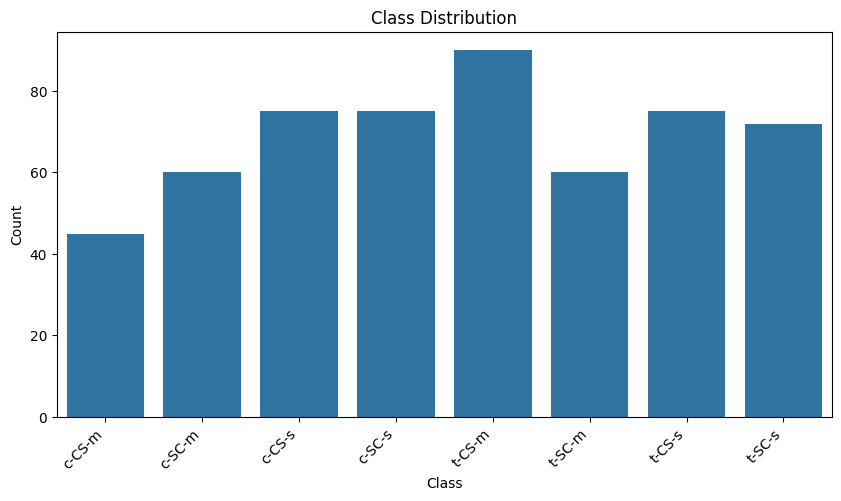

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df_mice_protein_filtered
class_counts = df_mice_protein_filtered['class'].value_counts()

print("Class Counts:\n", class_counts)

# Visualize class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=df_mice_protein_filtered)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### Ejercicio 3

A continuación, vamos a preparar los datos para poderlos usar en modelos predictivos.

a) Codifica las variables categóricas como numéricas. Usa una estrategia de Label Encoding (es decir, cada categoría de la variable tiene que ser un número).

b) Estandariza las variables numéricas.

c) Muestra una matriz de correlación con todas las variables. ¿Qué variables de expresión de proteinas están más relacionadas con el genotipo?

In [40]:
df_mice_protein_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 75 to 1049
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MouseID           552 non-null    object 
 1   DYRK1A_N          552 non-null    float64
 2   ITSN1_N           552 non-null    float64
 3   BDNF_N            552 non-null    float64
 4   NR1_N             552 non-null    float64
 5   NR2A_N            552 non-null    float64
 6   pAKT_N            552 non-null    float64
 7   pBRAF_N           552 non-null    float64
 8   pCAMKII_N         552 non-null    float64
 9   pCREB_N           552 non-null    float64
 10  pELK_N            552 non-null    float64
 11  pERK_N            552 non-null    float64
 12  pJNK_N            552 non-null    float64
 13  PKCA_N            552 non-null    float64
 14  pMEK_N            552 non-null    float64
 15  pNR1_N            552 non-null    float64
 16  pNR2A_N           552 non-null    float64
 17  

In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_mice_protein_filtered[col + '_encoded'] = le.fit_transform(df_mice_protein_filtered[col])

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# Create a StandardScaler object:
scaler = StandardScaler()

In [45]:
# Select the numerical features:
numerical_features = df_mice_protein_filtered.select_dtypes(include=np.number).drop(columns=['Genotype_encoded', 'Treatment_encoded', 'Behavior_encoded', 'class_encoded', 'MouseID_encoded']) # Exclude encoded categorical columns

In [46]:
# Fit and transform the scaler:
standardized_data = scaler.fit_transform(numerical_features)

In [47]:
# Update the DataFrame with standardized values:
df_mice_protein_filtered[numerical_features.columns] = standardized_data

In [48]:
df_mice_protein_filtered.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'pS6_N', 'SYP_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class',
       'Genotype_encoded', 'MouseID_encoded', 'Treatment_encoded',
       'Behavior_encoded', 'class_enco

### Ejercicio 4

a) Crea un modelo de aprendizaje automático para clasificar los ratones según su **Genotipo**. Muestra las métricas del modelo y las variables más importantes. Se puede identificar correctamente su genotipo según la expresión de proteínas? Y su clase? Razona tu respuesta.

b) Repite el procedimiento del apartado a), pero para predecir la **Clase**. **Opcional**

In [ ]:
# Respuesta